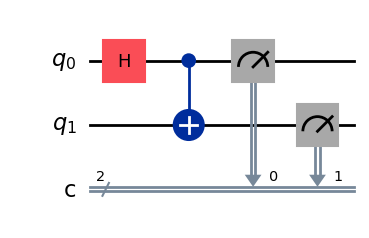

In [2]:
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import Counter
import os
import pickle


qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw("mpl")

In [3]:
service = QiskitRuntimeService(instance="open-instance")
fileName = "savedJob"
sample = 500

if os.path.exists(fileName):
    with open(fileName, "r") as f:
        job_id = f.read().strip()
    job = service.job(job_id)
else:
    backend = service.least_busy(simulator=False, operational=True)
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
    isa_circuit = pm.run(qc)
    sampler = Sampler(mode=backend)
    job = sampler.run([isa_circuit], shots=sample)
    with open(fileName, "w") as f:
        f.write(job.job_id())
print(job.job_id())

d5p6j61h2mqc739dr7sg


In [6]:
result = job.result()[0]
bitstrings = result.data.c.get_bitstrings()
counts = dict(Counter(bitstrings))
for key in counts:
    counts[key] = float(counts[key]) / sample


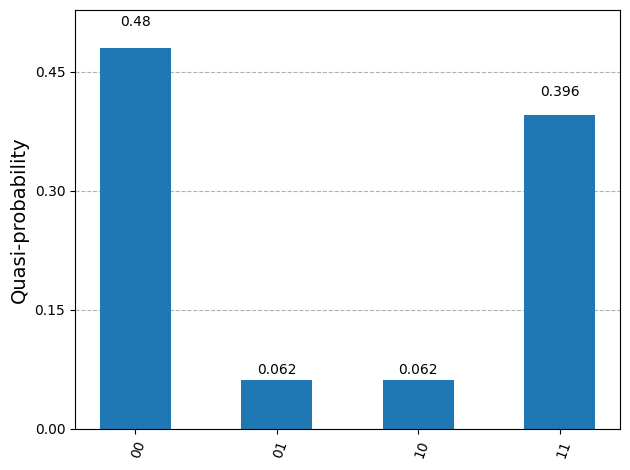

In [5]:
plot_histogram(counts)